In [146]:
#必要なモジュールをインポート
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [147]:
#データの読み込み
df = pd.read_csv('datafiles/Boston.csv')

In [148]:
df.head()


,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,high,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.70,7.12,27.5
1,low,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.60,27.71,13.2
2,very_low,82.5,2.03,0,0.415,6.162,38.4,6.2700,2.0,348,14.7,393.77,7.43,24.1
3,low,0.0,21.89,0,0.624,6.151,97.9,1.6687,4.0,437,21.2,396.90,18.46,17.8
4,high,0.0,18.10,0,0.614,6.980,67.6,2.5329,24.0,666,20.2,374.68,11.66,29.8


In [149]:
df

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,high,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.70,7.12,27.5
1,low,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.60,27.71,13.2
2,very_low,82.5,2.03,0,0.415,6.162,38.4,6.2700,2.0,348,14.7,393.77,7.43,24.1
3,low,0.0,21.89,0,0.624,6.151,97.9,1.6687,4.0,437,21.2,396.90,18.46,17.8
4,high,0.0,18.10,0,0.614,6.980,67.6,2.5329,24.0,666,20.2,374.68,11.66,29.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,high,0.0,18.10,0,0.740,6.219,100.0,2.0048,24.0,666,20.2,395.69,16.59,18.4
96,high,0.0,18.10,0,0.655,5.759,48.2,3.0665,24.0,666,20.2,334.40,14.13,19.9
97,high,0.0,18.10,0,0.671,6.380,96.2,1.3861,24.0,666,20.2,396.90,23.69,13.1
98,low,0.0,9.90,0,0.544,5.914,83.2,3.9986,4.0,304,18.4,390.70,18.33,17.8


In [150]:
#前処理

In [151]:
#ダミー変数化→文字列を値に割り当てる
#今回はCRIME列をダミー変数化
df['CRIME'].value_counts()

very_low    50
high        25
low         25
Name: CRIME, dtype: int64

In [152]:
crime = pd.get_dummies(df['CRIME'],drop_first=True)
crime2 = pd.get_dummies(df['CRIME'])
crime2

,high,low,very_low
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
95,1,0,0
96,1,0,0
97,1,0,0
98,0,1,0


In [153]:
df2 = pd.concat([df,crime],axis = 1)
df3 = pd.concat([df,crime2],axis = 1)

In [154]:
df3.head()

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,high,low,very_low
0,high,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.70,7.12,27.5,1,0,0
1,low,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.60,27.71,13.2,0,1,0
2,very_low,82.5,2.03,0,0.415,6.162,38.4,6.2700,2.0,348,14.7,393.77,7.43,24.1,0,0,1
3,low,0.0,21.89,0,0.624,6.151,97.9,1.6687,4.0,437,21.2,396.90,18.46,17.8,0,1,0
4,high,0.0,18.10,0,0.614,6.980,67.6,2.5329,24.0,666,20.2,374.68,11.66,29.8,1,0,0


In [155]:
#データの分割
#データを訓練用、チューニング用、テスト用に分ける
#まずはデータをトレーニング用とテスト用に分割
train_val,test = train_test_split(df3,test_size=0.2,random_state = 0)

In [156]:
test.shape

(20, 17)

In [157]:
#欠損値の処理
#まずはどこが欠損しているかを調べる
df3.isnull().sum()

CRIME       0
ZN          0
INDUS       0
CHAS        0
NOX         1
RM          0
AGE         0
DIS         0
RAD         1
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE       0
high        0
low         0
very_low    0
dtype: int64

In [158]:
#欠損値の穴埋め
#今回は平均値で埋める
train_val_mean = train_val.mean()

C:\Users\tnakg\AppData\Local\Temp/ipykernel_2028/4200866346.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_val_mean = train_val.mean()


In [159]:
train_val_mean

ZN            9.337500
INDUS        10.477500
CHAS          0.037500
NOX           0.542658
RM            6.171375
AGE          66.245000
DIS           3.944925
RAD           8.737500
TAX         378.500000
PTRATIO      18.595000
B           370.746750
LSTAT        12.484250
PRICE        22.922500
high          0.250000
low           0.250000
very_low      0.500000
dtype: float64

In [160]:
train_val2 = train_val.fillna(train_val_mean)

In [161]:
#外れ値の処理
#散布図を描画して外れ値を探す
colname = train_val2.columns #dfの列名をリストで取得

In [162]:
colname

Index(['CRIME', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE', 'high', 'low', 'very_low'],
      dtype='object')

In [163]:
type(colname)

pandas.core.indexes.base.Index

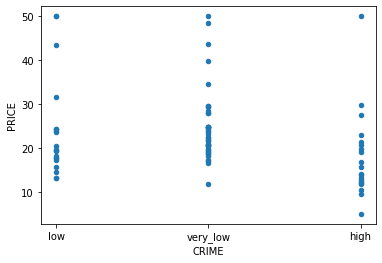

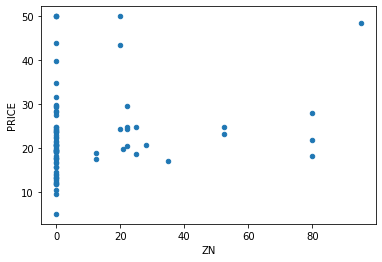

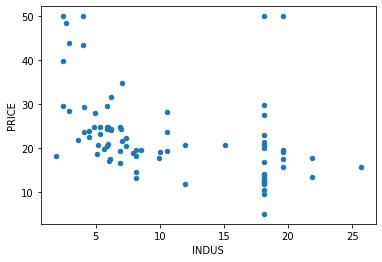

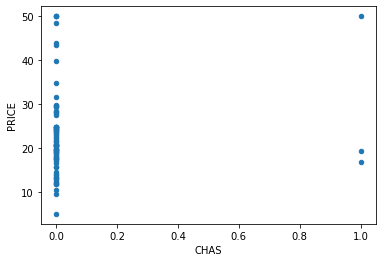

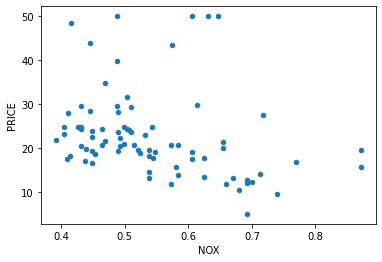

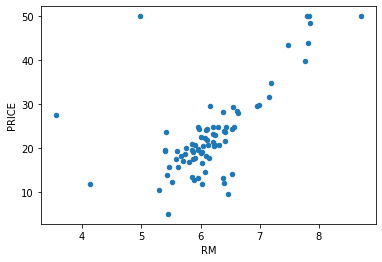

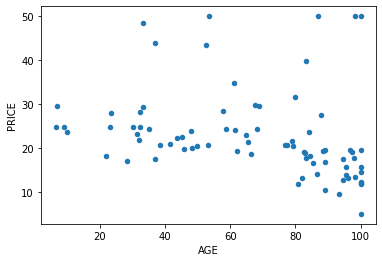

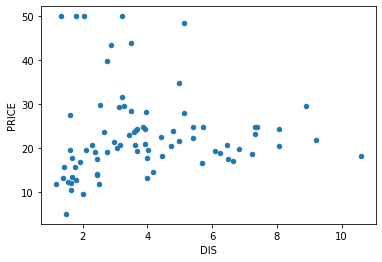

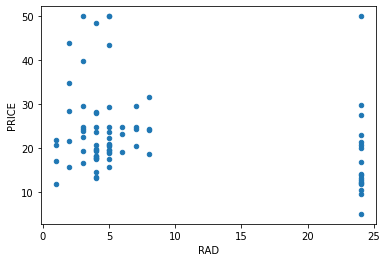

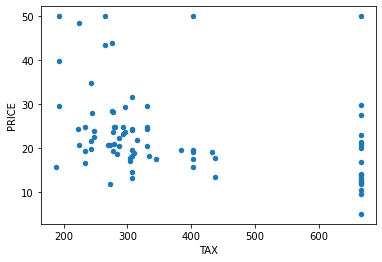

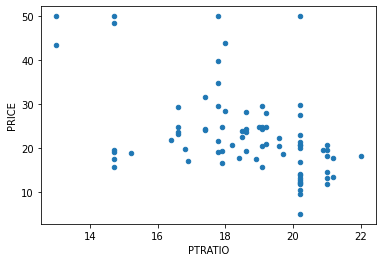

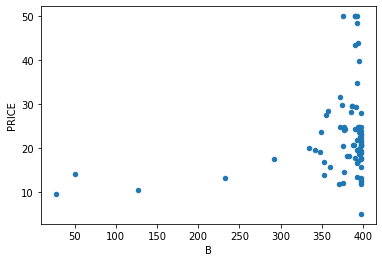

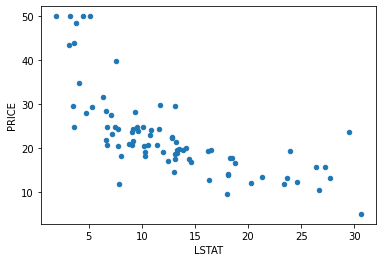

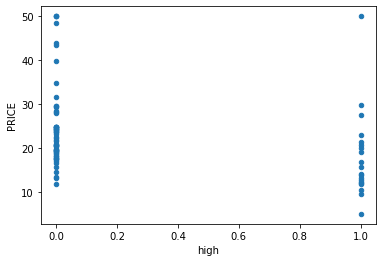

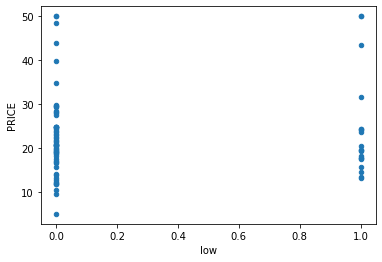

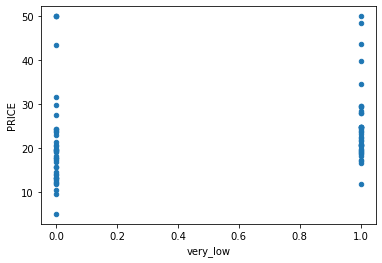

In [164]:
#for文で各列を横軸にした散布図を描画
for name in colname:
    if name != 'PRICE':
        train_val2.plot(kind='scatter',x = name, y = 'PRICE')

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

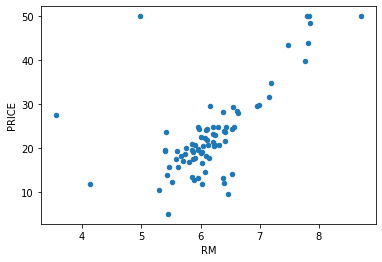

In [165]:
#散布図の相関から特徴量を決める
#とりあえず外れ値の処理
train_val2.plot(kind='scatter',x = 'RM', y = 'PRICE')


In [166]:
#RMの外れ値を削除する
#外れ値のインデックスを取得
out_rm = train_val2[(train_val2['RM'] < 6) & (train_val2['PRICE'] > 40)]

In [167]:
out_rm

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,high,low,very_low
76,high,0.0,18.1,0,0.631,4.97,100.0,1.3325,24.0,666,20.2,375.52,3.26,50.0,1,0,0


In [168]:
train_val3 = train_val2.drop([76],axis = 0) #index 76の行を削除

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

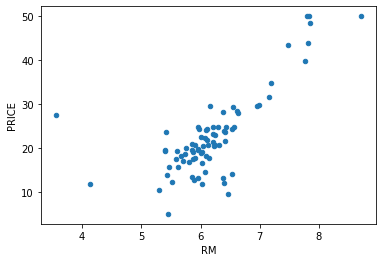

In [169]:
train_val3.plot(kind='scatter',x = 'RM', y = 'PRICE')

In [170]:
out_rm2 = train_val3[(train_val3['RM'] < 4) & (train_val3['PRICE'] > 20)]

In [171]:
out_rm2

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,high,low,very_low
0,high,0.0,18.1,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5,1,0,0


In [172]:
train_val4 = train_val3.drop([0],axis=0)

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

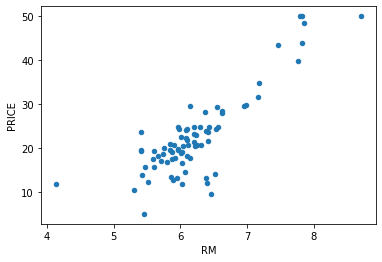

In [173]:
train_val4.plot(kind='scatter',x = 'RM', y = 'PRICE')

In [174]:
#列同士の相関係数の取得
train_val4.corr()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,high,low,very_low
ZN,1.000000,-0.393267,-0.092105,-0.467354,0.184590,-0.485913,0.611670,-0.227151,-0.247730,-0.211499,0.135642,-0.354809,0.225807,-0.252239,-0.182892,0.372392
INDUS,-0.393267,1.000000,0.183496,0.781053,-0.383278,0.613977,-0.645376,0.609775,0.732993,0.240133,-0.313237,0.599057,-0.484618,0.690664,0.120355,-0.687320
CHAS,-0.092105,0.183496,1.000000,0.154195,0.033338,0.190219,-0.139677,0.065514,0.097398,-0.071463,0.025510,0.024589,0.132514,0.048686,0.187910,-0.205196
NOX,-0.467354,0.781053,0.154195,1.000000,-0.221214,0.663164,-0.751117,0.594061,0.682204,0.061884,-0.377899,0.512135,-0.342991,0.687029,0.126747,-0.689841
RM,0.184590,-0.383278,0.033338,-0.221214,1.000000,-0.184787,0.028441,-0.232088,-0.306646,-0.402717,0.078885,-0.651690,0.847673,-0.271742,0.027957,0.204636
AGE,-0.485913,0.613977,0.190219,0.663164,-0.184787,1.000000,-0.694083,0.326112,0.419078,0.087529,-0.220197,0.514685,-0.353184,0.395739,0.259069,-0.559899
DIS,0.611670,-0.645376,-0.139677,-0.751117,0.028441,-0.694083,1.000000,-0.413483,-0.468189,-0.036666,0.224586,-0.425471,0.097350,-0.487864,-0.183028,0.571125
RAD,-0.227151,0.609775,0.065514,0.594061,-0.232088,0.326112,-0.413483,1.000000,0.947886,0.384262,-0.383991,0.410845,-0.375583,0.915575,-0.246159,-0.556722
TAX,-0.247730,0.732993,0.097398,0.682204,-0.306646,0.419078,-0.468189,0.947886,1.000000,0.381015,-0.387064,0.457091,-0.455967,0.913849,-0.184326,-0.609283
PTRATIO,-0.211499,0.240133,-0.071463,0.061884,-0.402717,0.087529,-0.036666,0.384262,0.381015,1.000000,-0.146546,0.337674,-0.551232,0.281146,-0.130711,-0.122798


In [175]:
#特定の列に対する相関係数を取得
train_cor = train_val4.corr()['PRICE'] #corrの戻り値はデータフレーム

In [176]:
train_cor
type(train_cor)

pandas.core.series.Series

In [177]:
#上のデータを絶対値をとって降順で並び替える
#絶対値への変換はmap関数を使う
#mapを使うためにはSeries型のデータを取得する
#今回はtrain_corがSeries型なのでこのまま使える
se = train_cor.map(abs) #Seriesのメソッドとしてmapを使う 適用する関数を引数にとる

In [178]:
se

ZN          0.225807
INDUS       0.484618
CHAS        0.132514
NOX         0.342991
RM          0.847673
AGE         0.353184
DIS         0.097350
RAD         0.375583
TAX         0.455967
PTRATIO     0.551232
B           0.279478
LSTAT       0.692145
PRICE       1.000000
high        0.404640
low         0.087673
very_low    0.264492
Name: PRICE, dtype: float64

In [179]:
type(se)

pandas.core.series.Series

In [180]:
se.sort_values(ascending = False)

PRICE       1.000000
RM          0.847673
LSTAT       0.692145
PTRATIO     0.551232
INDUS       0.484618
TAX         0.455967
high        0.404640
RAD         0.375583
AGE         0.353184
NOX         0.342991
B           0.279478
very_low    0.264492
ZN          0.225807
CHAS        0.132514
DIS         0.097350
low         0.087673
Name: PRICE, dtype: float64

<AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>

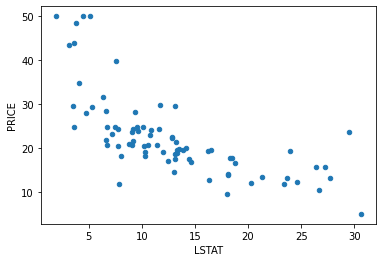

In [181]:
#特徴量は相関係数の上位3つにする
#LSTATの外れ値処理
train_val4.plot(kind='scatter', x = 'LSTAT',y = 'PRICE')

In [182]:
#LSTATは外れ値がなさそうなので何もしない

<AxesSubplot:xlabel='PTRATIO', ylabel='PRICE'>

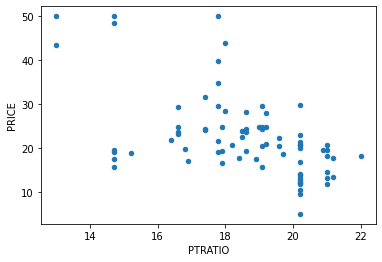

In [183]:
#PTRATIOの外れ値処理
train_val4.plot(kind='scatter', x = 'PTRATIO',y = 'PRICE')

In [184]:
#PTRATIOもなさそうなので何もしない


In [185]:
#特徴量とする列を抽出
col = ['RM','LSTAT','PTRATIO']
x = train_val4[col]


In [186]:
x

,RM,LSTAT,PTRATIO
43,6.108,9.16,19.1
62,6.957,3.53,19.1
3,6.151,18.46,21.2
71,6.108,6.57,16.4
45,5.963,13.45,16.8
...,...,...,...
96,5.759,14.13,20.2
67,6.310,6.75,20.2
64,6.249,10.59,18.2
47,6.625,6.65,18.0


In [187]:
#正解用データ
t = train_val4['PRICE']

In [188]:
t

43    24.3
62    29.6
3     17.8
71    21.9
45    19.7
      ... 
96    19.9
67    20.7
64    20.6
47    28.4
44    21.0
Name: PRICE, Length: 78, dtype: float64

In [189]:
#x,tを学習用とチューニング用に分ける
x_train,x_tune,y_train,y_tune = train_test_split(x,t,test_size=0.2,random_state=0)

In [190]:
x_train

,RM,LSTAT,PTRATIO
71,6.108,6.57,16.4
41,6.096,10.26,21.0
99,5.453,30.59,20.2
40,7.470,3.16,13.0
79,5.304,26.64,20.2
...,...,...,...
67,6.310,6.75,20.2
70,5.412,29.55,18.6
58,5.706,12.43,16.9
89,7.831,4.45,17.8


In [191]:
#データの標準化
#データの規模をそろえるために平均と標準偏差を列で統一する
#データを平均値との差を標準偏差で割る
#sklearnのモジュールを利用する
from sklearn.preprocessing import StandardScaler


In [192]:
sc_model_x = StandardScaler() #標準化を行うインスタンス

In [193]:
sc_model_x.fit(x_train) #x_trainの各列の平均値と標準偏差を求めてインスタンス変数に格納

StandardScaler()

In [194]:
sc_x = sc_model_x.transform(x_train) # sc_xに標準化したデータを格納　戻り値はarray

In [195]:
sc_x

array([[-0.13995736, -0.8908283 , -1.06480489],
       [-0.15801951, -0.38018287,  1.34155291],
       [-1.12584956,  2.43321054,  0.9230559 ],
       [ 1.91009633, -1.36272557, -2.84341718],
       [-1.35012122,  1.88658467,  0.9230559 ],
       [-0.35369277, -0.39817309,  0.39993464],
       [-0.27090793, -0.37464742, -0.33243512],
       [-0.52829353, -0.58637845,  0.39993464],
       [ 2.48657986, -1.27277448, -1.95411104],
       [-0.279939  , -0.0203785 ,  0.03374976],
       [-0.07222431,  0.01975353, -0.33243512],
       [-0.88502093,  1.97238417,  0.34762252],
       [ 0.35675168, -1.30321947,  0.34762252],
       [ 0.28299791, -0.4687501 ,  0.03374976],
       [-1.19960332,  1.51847712,  0.08606188],
       [-0.35820831,  0.06126942, -0.85555639],
       [ 0.26192541, -0.50196281,  0.08606188],
       [-0.43196207,  0.73659454, -0.01856237],
       [-0.1730713 , -0.29438337, -0.54168363],
       [-0.24080435, -0.73445179,  0.60918315],
       [-0.25736132,  0.8016361 , -0.280

In [196]:
#arrayをdfに変換する
x_train_df = pd.DataFrame(sc_x,columns=col) #columnsにはcolumnの名前のリストを渡す

In [197]:
x_train_df

,RM,LSTAT,PTRATIO
0,-0.139957,-0.890828,-1.064805
1,-0.158020,-0.380183,1.341553
2,-1.125850,2.433211,0.923056
3,1.910096,-1.362726,-2.843417
4,-1.350121,1.886585,0.923056
...,...,...,...
57,0.164089,-0.865919,0.923056
58,-1.187562,2.289289,0.086062
59,-0.745039,-0.079885,-0.803244
60,2.453466,-1.184207,-0.332435


In [198]:
x_train_df.mean() #平均値が0になっているかの確認

RM         8.344580e-16
LSTAT     -5.730183e-17
PTRATIO    8.953411e-16
dtype: float64

In [199]:
#正解データの標準化
y_sc_model = StandardScaler()

In [200]:
#y_sc_model.fit(y_train) だとy_trainがSeries型なのでうまく変換できない
#y_trainをdfに変換してから標準化する

In [201]:
y_tmp_df = pd.DataFrame(y_train) #Series型を引数にするとdfに変換してくれる

In [202]:
y_sc_model.fit(y_tmp_df)

StandardScaler()

In [203]:
sc_y = y_sc_model.transform(y_tmp_df)

In [204]:
sc_y.mean()

-1.8264959437381609e-16

In [205]:
type(sc_y)

numpy.ndarray

In [206]:
y_train_df = pd.DataFrame(sc_y,columns=['PRICE']) #array型をdfに変換　columnsはリストであることが必要なので注意

In [207]:
y_train_df

,PRICE
0,-0.050936
1,-0.469745
2,-1.963872
3,2.394000
4,-1.352638
...,...
57,-0.186766
58,0.152809
59,-0.594255
60,3.129745


In [208]:
#ここまでで学習用データの標準化が完了

In [209]:
#モデルの学習

In [210]:
model = LinearRegression() #線形回帰をモデルとして使う

In [211]:
model.fit(x_train_df,y_train_df)

LinearRegression()

In [212]:
#チューニング用データの標準化
#学習データの平均と標準偏差を使うことに注意
sc_x_tune = sc_model_x.transform(x_tune)

In [213]:
x_tune_df = pd.DataFrame(sc_x_tune,columns = col)

In [214]:
x_tune_df

,RM,LSTAT,PTRATIO
0,-0.472602,0.462590,0.923056
1,0.645746,-1.149611,0.399935
2,-0.331115,-0.187826,-0.541684
3,-1.164984,0.710301,0.923056
4,0.061737,-0.313757,0.923056
5,-0.526788,0.479196,1.289241
6,-0.665265,0.155372,0.923056
7,0.072273,-0.334515,-0.123187
8,-0.194144,0.004531,1.341553
9,-0.257361,-0.709542,1.341553


In [215]:
sc_y_tune = y_sc_model.transform(pd.DataFrame(y_tune,columns=['PRICE']))

In [216]:
y_tune_df = pd.DataFrame(sc_y_tune,columns=['PRICE'])

In [217]:
y_tune_df

,PRICE
0,-1.092298
1,0.628213
2,0.220723
3,-0.967787
4,0.073574
5,-0.322596
6,-0.277319
7,-0.198085
8,-0.888553
9,-1.182851


In [218]:
model.score(x_tune_df,y_tune_df)

0.8875108977784512

In [219]:
#上記の処理をまとめて関数化する→チューニングをしやすくするため
#前処理後の特徴量のdfと正解のdfを受け取って学習スコアとチューニングスコアを出力する

def learn(x,t):
    x_train,x_tune,y_train,y_tune = train_test_split(x,t,test_size=0.2,random_state=0) #データを学習とチューニング用に分割
    #学習データの標準化
    sc_model_x = StandardScaler()
    sc_model_y = StandardScaler()
    sc_model_x.fit(x_train)
    sc_model_y.fit(pd.DataFrame(y_train,columns=['PRICE']))
    sc_x_train = sc_model_x.transform(x_train)
    sc_y_train = sc_model_y.transform(pd.DataFrame(y_train,columns=['PRICE'])) #yはSeriesをdfに変換する
    #一応arrayをdfに変換
    sc_x_train_df = pd.DataFrame(sc_x_train,columns = x_train.columns)
    sc_y_train_df = pd.DataFrame(sc_y_train,columns = ['PRICE'])
    #モデルの学習
    model = LinearRegression()
    model.fit(sc_x_train_df,sc_y_train_df)
    
    #チューニングデータの標準化
    sc_x_tune = sc_model_x.transform(x_tune)
    sc_y_tune = sc_model_y.transform(pd.DataFrame(y_tune,columns=['PRICE']))
    sc_x_tune_df = pd.DataFrame(sc_x_tune,columns = x_train.columns)
    sc_y_tune_df = pd.DataFrame(sc_y_tune,columns = ['PRICE'])
    
    #精度の評価
    train_score = model.score(sc_x_train_df,sc_y_train_df)
    tune_score = model.score(sc_x_tune_df,sc_y_tune_df)
    return train_score,tune_score

In [220]:
#関数を使ってみる
#欠損値の穴埋め後のdfから特徴量を抽出
x = train_val4.loc[:,['RM','LSTAT','PTRATIO']]
t = train_val4[['PRICE']]


In [221]:
s1,s2 = learn(x,t)

In [222]:
print(s1,s2) #結果

0.7573120925057222 0.8875108977784512


In [223]:
#ここから精度を上げるためのチューニングを行う

In [224]:
#特徴量の増加
x = train_val4.loc[:,['RM','LSTAT','PTRATIO','INDUS']]
t = train_val4[['PRICE']]
s1,s2 = learn(x,t)

In [225]:
print(s1,s2) #単に特徴量を増やすだけだと精度は下がる→学習用データに対する過学習が起こっている

0.7775468616083849 0.8448088597818566


In [231]:
#特徴量エンジニアリングを行う
#元のデータを使って列を追加する
#元のデータを2乗した列など
x1 = train_val4.loc[:,['RM','LSTAT','PTRATIO']]
t1 = train_val4[['PRICE']]

x1['RM2'] = x1['RM'] ** 2 #RMを2乗した値を新たな列として追加
s1,s2 = learn(x1,t1)
print(s1,s2) #精度が下がることもある

0.8483418551526014 0.7983800008274042


In [236]:
#交互作用特徴量
#特徴量の列どうしの演算から新たな特徴量をつくる
x1['RM*LSTAT'] = x1['RM'] * x1['LSTAT'] #Series同士で演算が可能
s1,s2 = learn(x1,t1)
print(s1,s2) #精度が向上した


0.8667358850139589 0.8884050734153516


In [240]:
#与える特徴量が決定したのでテスト用のモデルを作成する
#学習用とチューニング用のデータをすべて使ってモデルを生成する
sc_model_x2 = StandardScaler()
sc_model_x2.fit(x1)
sc_x = sc_model_x2.transform(x1)

sc_model_t2 = StandardScaler()
sc_model_t2.fit(t)
sc_t= sc_model_t2.transform(t)

model = LinearRegression()
model.fit(sc_x,sc_t)

LinearRegression()

In [243]:
#テストデータでモデルを評価する
#学習でおこなった前処理をテストデータにも行う
#ただし、外れ値処理は行わない

test2 = test.fillna(train_val.mean())
x_test = test2.loc[:,['RM','LSTAT','PTRATIO']]
y_test = test2[['PRICE']]

C:\Users\tnakg\AppData\Local\Temp/ipykernel_2028/1807870596.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test2 = test.fillna(train_val.mean())


In [244]:
x_test['RM2'] = x_test['RM'] ** 2

In [245]:
x_test['RM*LSTAT'] = x_test['RM'] * x_test['LSTAT']

In [248]:
#標準化
sc_x_test = sc_model_x2.transform(x_test)
sc_y_test = sc_model_t2.transform(y_test)
model.score(sc_x_test,sc_y_test) 

0.7688857678988379

In [ ]:
#モデルの保存